In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv(r"D:\Machine_Learning\Data_sets\LogisticRegression-main\healthcare-dataset-stroke-data.csv")

In [3]:
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.shape

(5110, 12)

In [5]:
data.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [6]:
X_feature=data.drop('stroke',axis=1)
y_target=data["stroke"]

In [7]:
y_target

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [8]:
X_feature.drop("id",axis=1,inplace=True)

In [9]:
X_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB


In [10]:
X_feature.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64

In [11]:
X_feature['bmi'].fillna(X_feature['bmi'].mean(), inplace=True)

In [12]:
X_feature.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [13]:
X_feature.drop('ever_married',axis=1,inplace=True)

In [14]:
X_feature.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.000000,never smoked


<AxesSubplot:>

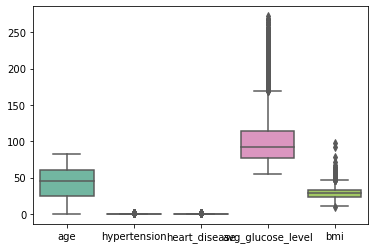

In [15]:
# fig ax = plt.subplots(figsize=(8,8))
sb.boxplot(data=X_feature, palette='Set2')


In [16]:
X_feature_knn=X_feature

In [17]:
X_feature_knn=pd.get_dummies(X_feature_knn)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_feature_knn,y_target,test_size=.30,random_state=101)

# Implementing KNN


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
k=int(np.sqrt(len(Xtrain)))+1
k_value=list(range(1,k))

In [22]:
list_acc=[]
for i in k_value:
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model=knn_model.fit(Xtrain,Ytrain)
    Yp=knn_model.predict(Xtest)
    acc=accuracy_score(Yp,Ytest)
    list_acc.append(acc)
    #print("acc is {} at k ={}".format(acc,i))

In [23]:
import numpy as np
list_arr=np.array(list_acc)
list_arr.argmax()

9

In [25]:
print("Max acc is {} at k ={}".format(list_arr[list_arr.argmax()],list_arr.argmax()))

Max acc is 0.9432485322896281 at k =9


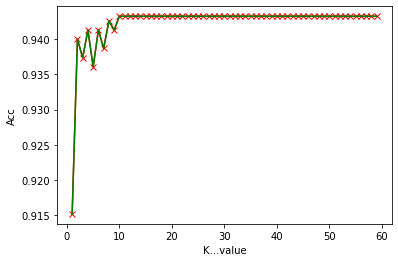

In [26]:
plt.plot(k_value,list_acc,'rx-')
plt.plot(k_value,list_acc,'g')
plt.xlabel("K...value")
plt.ylabel("Acc")
plt.show()

In [27]:
model_lr=LogisticRegression()
model_lr=model_lr.fit(Xtrain,Ytrain)

C:\Users\oksin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
Yp_lr=model_lr.predict(Xtest)

In [29]:
acc_lr=accuracy_score(Yp_lr,Ytest)*100

In [30]:
acc_lr

94.3900848010437